<h1>Shapiro-Wilk Test</h1>

<h3><font color='grey'>P-values 5%+ are likely normally distributed</font></h3>

<br>

In [278]:
# libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# style
from ipynb.fs.full.i_Style_Sheet import *
plt.style.use(style_use)
plt.rcParams.update(style_params)

# sample normal dist data
np.random.seed(1)
mu, sigma, s = 10, 1, 4999
sample = pd.DataFrame({'values':np.random.normal(mu, sigma, s)})
print(sample.head())

# shapiro wilk test
from scipy.stats import shapiro
stat, p = shapiro(sample)
print(f'\nP-value: {p}')

      values
0  11.624345
1   9.388244
2   9.471828
3   8.927031
4  10.865408

P-value: 0.46416887640953064


In [282]:
# logic
if p >= 0.05:
    print(f'\nP-value: {p}\nLikely normal')
else:
    print(f'P-value: {p}\nLikely not normal')


P-value: 0.46416887640953064
Likely normal


In [251]:
# scipy
from scipy.stats import shapiro

# shapiro wilk test
def swt(data):
    data.dropna(inplace=True)
    stat, p = shapiro(data)
    p = round(p, 4)
    return p

# run
p = swt(sample)
print(f'Sample:\t{p}')

Sample:	0.4642


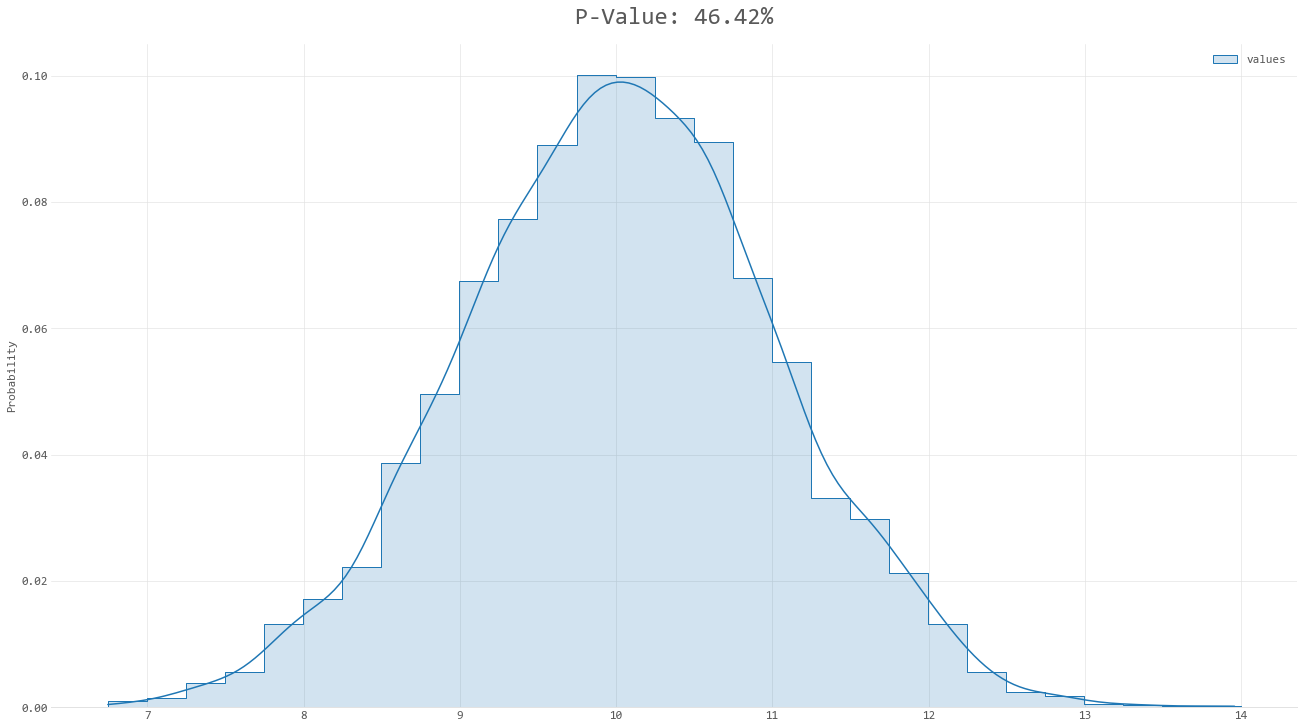

In [265]:
# viz
fig, ax = plt.subplots(1, 1, figsize=(18,10), constrained_layout=True)
sns.histplot(ax=ax, data=sample, kde=True, binwidth=0.25,
             stat='probability', element='step', alpha=0.2)
ax.set_title(f'P-Value: {p*100}%')
plt.show()